# Class project

### 2. By using the same data in 1, compress Pokemon image data using Autoencoder.
cr. https://colab.research.google.com/drive/12_v73VGIML5Im7D3cXqiJIeD33Z0DJtD

In [81]:
import os, sys

pokemon_y = []
fullpath = []
path = "pokemonclassification/PokemonData"
dirs = os.listdir( path )
for files in dirs:
    pokemon_y.append(files)
    files_path = path + "/" + files
    file = os.listdir( files_path )
    img_path = []
    for img in file:
        img_path.append(files_path + "/" + img )
    fullpath.append(img_path) 


# pokemon_y : Keeping the Pokemon name in array
# fullpath  : The path to the each Pokemon image

# print(pokemon_y)
# print(len(pokemon_y))
# print(fullpath)

# pic: 6834 pics

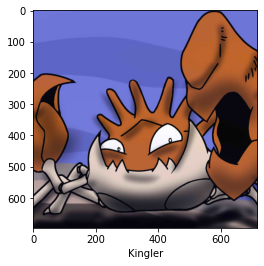

(696, 718, 3)


In [82]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread(fullpath[1][0])
plt.imshow(img, cmap = 'gray')
plt.xlabel(pokemon_y[1])
plt.show()
print(img.shape)

In [83]:
pokemon_x = []
for i in range(0,len(fullpath)):
    print('{} : {} : {}'.format(i, pokemon_y[i], len(fullpath[i]) ))
    for pokemon in fullpath[i]:
        pokemon_x.append(cv2.cvtColor(mpimg.imread(pokemon), cv2.COLOR_BGR2GRAY))
    pokemon_x = []

0 : Starmie : 49
1 : Kingler : 47
2 : Omanyte : 45
3 : Drowzee : 39
4 : Ponyta : 45
5 : Wartortle : 48
6 : Haunter : 48
7 : Golduck : 47
8 : Abra : 35
9 : Slowpoke : 41
10 : Cloyster : 49
11 : Nidoking : 52
12 : Zubat : 40
13 : Poliwrath : 31
14 : Seel : 48
15 : Poliwag : 51
16 : Machamp : 53
17 : Scyther : 58
18 : Exeggcute : 46
19 : Parasect : 43
20 : Jigglypuff : 46
21 : Chansey : 43
22 : Moltres : 43
23 : Pikachu : 59
24 : Venonat : 47
25 : Electabuzz : 41
26 : MrMime : 45
27 : Jolteon : 51
28 : Growlithe : 44
29 : Ninetales : 44
30 : Grimer : 44
31 : Omastar : 44
32 : Gloom : 49
33 : Rattata : 43
34 : Exeggutor : 52
35 : Pidgeotto : 40
36 : Ivysaur : 40
37 : Pidgeot : 43
38 : Zapdos : 52


UnidentifiedImageError: cannot identify image file 'pokemonclassification/PokemonData/Zapdos/c99b2d19544c4cbbacd7711ade660279.svg'

#### The auto-encoder network : three layers
* the input layer
* the hidden layer
* the output layer

In [36]:
# get an input
import cv2
pokemon_x = []
for pokemon in fullpath[3]:
    pokemon_x.append(cv2.cvtColor(mpimg.imread(pokemon), cv2.COLOR_BGR2GRAY))
    # convert the image to gray scale : using cvtColor function' -> [0,255]
    
#     pokemon_x.append(mpimg.imread(pokemon))

print(pokemon_x[0]) 
print(pokemon_x[0].shape) 
print(pokemon_x[1].shape)


[[164 166 170 ... 203 203 204]
 [142 150 159 ... 201 201 201]
 [ 97 107 118 ... 198 198 198]
 ...
 [ 99  99 100 ... 175 175 175]
 [ 99  99  99 ... 174 174 174]
 [ 99  99  99 ... 174 174 174]]
(342, 342)
(685, 711)


In [29]:
# # using Keras
# import tensorflow as tf
# import tensorflow.keras.layers
# import tensorflow.keras.models

# inputs = tf.keras.Input(shape=pokemon_x[0].shape)
# encoder = tf.keras.layers.Dense(3, activation='relu')
# decoder = tf.keras.layers.Dense(pokemon_x[0].shape, activation='relu')
# outputs = decoder(encoder(inputs))

In [ ]:
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), 
              optimizer = tf.keras.optimizers.SGD(learning_rate = 3.5))

In [ ]:
model.fit(pokemon_x,pokemon_x, epochs = 200, verbose = 0)

In [ ]:
z = model.predict(X)
print(z)

print(encoder(x))